In [2]:
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import numpy as np
from safetensors import safe_open
from scipy.stats import entropy
import torch

In [3]:
tensors = safe_open("tensors/cds_1.safetensors", "pt")

In [4]:
probs = tensors.get_tensor("probs")

In [5]:
probs

tensor([[0.2812, 0.2246, 0.2314, 0.2637],
        [0.2070, 0.2930, 0.2441, 0.2578],
        [0.2734, 0.2676, 0.2656, 0.1934],
        ...,
        [0.0947, 0.5977, 0.1099, 0.1963],
        [0.1099, 0.4238, 0.3145, 0.1523],
        [0.1177, 0.4473, 0.3262, 0.1079]], dtype=torch.bfloat16)

In [6]:
probs_max = probs.max(dim=1).values
probs_max

tensor([0.2812, 0.2930, 0.2734,  ..., 0.5977, 0.4238, 0.4473],
       dtype=torch.bfloat16)

In [7]:
x = np.linspace(0, len(probs_max)-1, len(probs_max))
x

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 2.472e+03, 2.473e+03,
       2.474e+03])

In [8]:
probs_np = probs_max.to(torch.float32).numpy()
probs_np

array([0.28125   , 0.29296875, 0.2734375 , ..., 0.59765625, 0.42382812,
       0.44726562], dtype=float32)

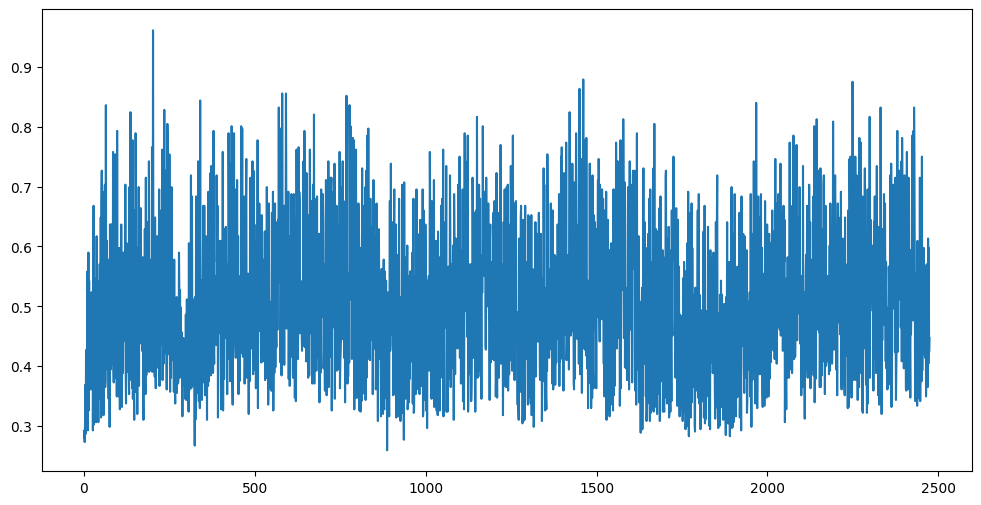

In [9]:
plt.figure(figsize=(12,6))
plt.plot(x,probs_np)
plt.savefig("plots/cds_1_probs.png")

In [10]:
roderic_tensors = safe_open("tensors/roderic_seq.safetensors", framework="pt")

In [11]:
roderic_probs = roderic_tensors.get_tensor("probs")
roderic_probs

tensor([[0.2812, 0.2246, 0.2295, 0.2637],
        [0.2363, 0.3242, 0.2676, 0.1729],
        [0.2656, 0.3027, 0.2021, 0.2314],
        ...,
        [0.3008, 0.2031, 0.2480, 0.2490],
        [0.2490, 0.1387, 0.3281, 0.2852],
        [0.2520, 0.1729, 0.2461, 0.3301]], dtype=torch.bfloat16)

In [12]:
roderic_probs_max = roderic_probs.max(dim=1).values
roderic_probs_max

tensor([0.2812, 0.3242, 0.3027,  ..., 0.3008, 0.3281, 0.3301],
       dtype=torch.bfloat16)

In [13]:
roderic_probs_np = roderic_probs.to(torch.float32).numpy()

In [14]:
roderic_probs_max = roderic_probs_np.max(axis=1)

In [15]:
x = np.linspace(0, len(roderic_probs_max)-1, len(roderic_probs_max))

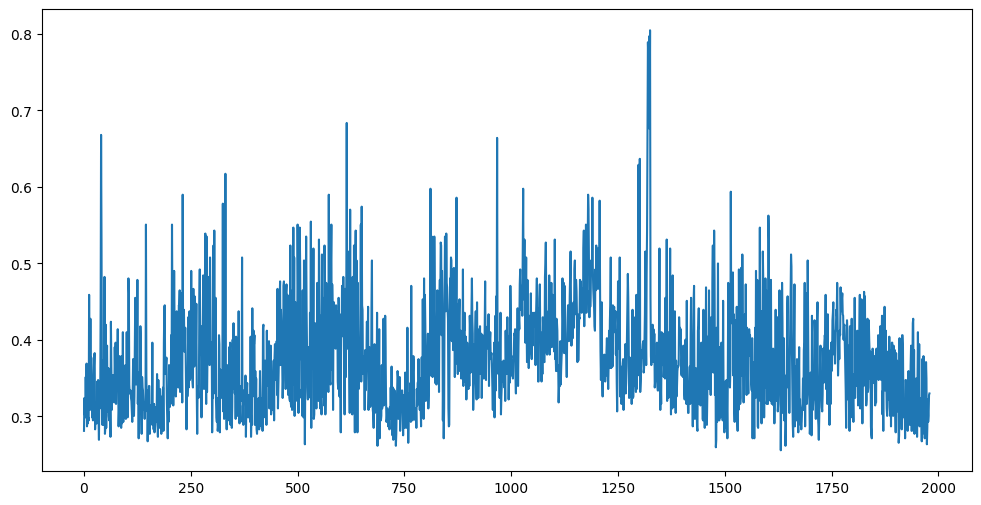

In [16]:
plt.figure(figsize=(12,6))
plt.plot(x,roderic_probs_max)

In [17]:
roderic_entropy = entropy(roderic_probs_np, axis=1, base=2)
roderic_entropy

array([1.9935828, 1.964818 , 1.9837387, ..., 1.9862397, 1.9379237,
       1.9639109], dtype=float32)

In [18]:
entropy([0.25, 0.25, 0.25, 0.25], base=2)

np.float64(2.0)

In [19]:
entropy([1, 0, 0, 0], base=2)

np.float64(0.0)

Text(0.5, 1.0, 'Information content per position')

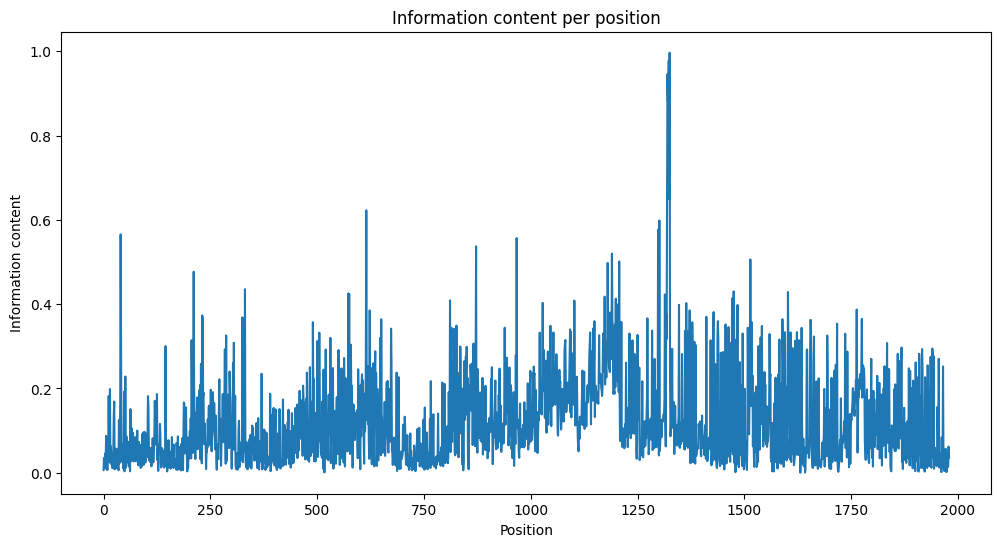

In [20]:
plt.figure(figsize=(12,6))
plt.plot(x, 2 - roderic_entropy)
plt.xlabel("Position")
plt.ylabel("Information content")
plt.title("Information content per position")

In [21]:
roderic_entropy_smooth = np.convolve(roderic_entropy, [0.25, 0.5, 0.25], "same")
roderic_entropy_smooth

array([1.48799592, 1.97673938, 1.98010334, ..., 1.97369885, 1.95649949,
       1.46643639])

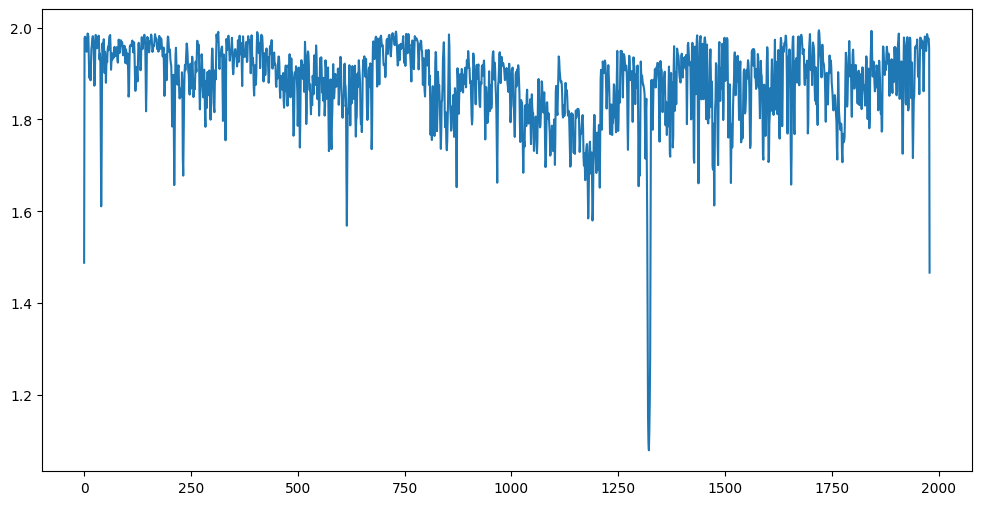

In [22]:
plt.figure(figsize=(12,6))
plt.plot(x, roderic_entropy_smooth)

In [23]:
roderic_ic_smooth = 2 - roderic_entropy_smooth

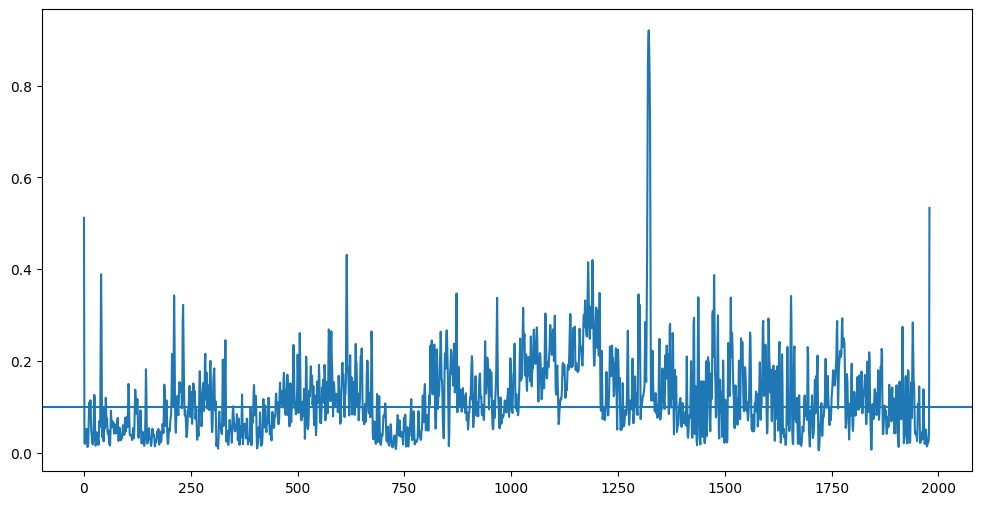

In [24]:
plt.figure(figsize=(12,6))
plt.plot(x, roderic_ic_smooth)
plt.axhline(y=0.1)

In [25]:
exon_raw_roderic = [1 if i > 0.15 else 0 for i in roderic_ic_smooth]

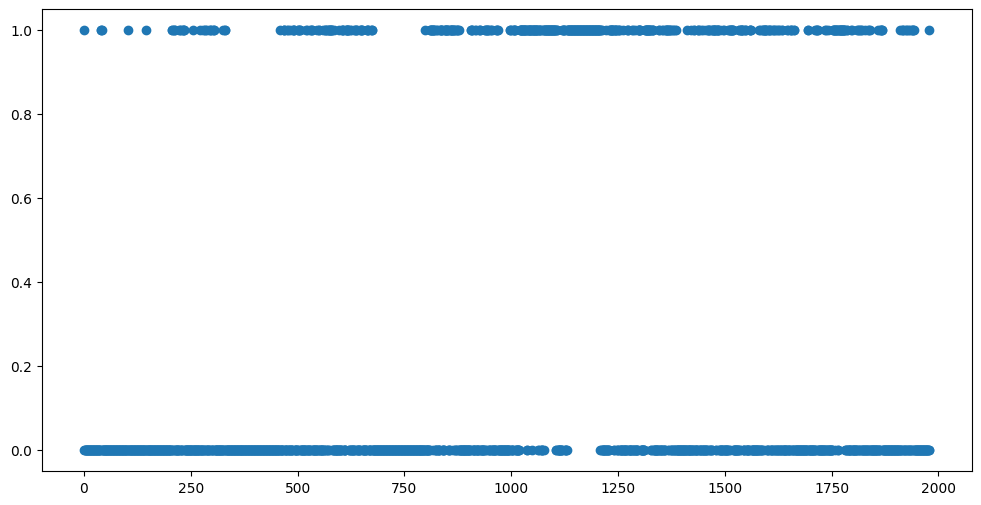

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(x, exon_raw_roderic)

In [27]:
exon_filter1 = exon_raw_roderic.copy()
for i in range(1, len(exon_raw_roderic) - 1):
    if exon_raw_roderic[i] and not (exon_raw_roderic[i-1] or exon_raw_roderic[i+1]):
        exon_filter1[i] = 0

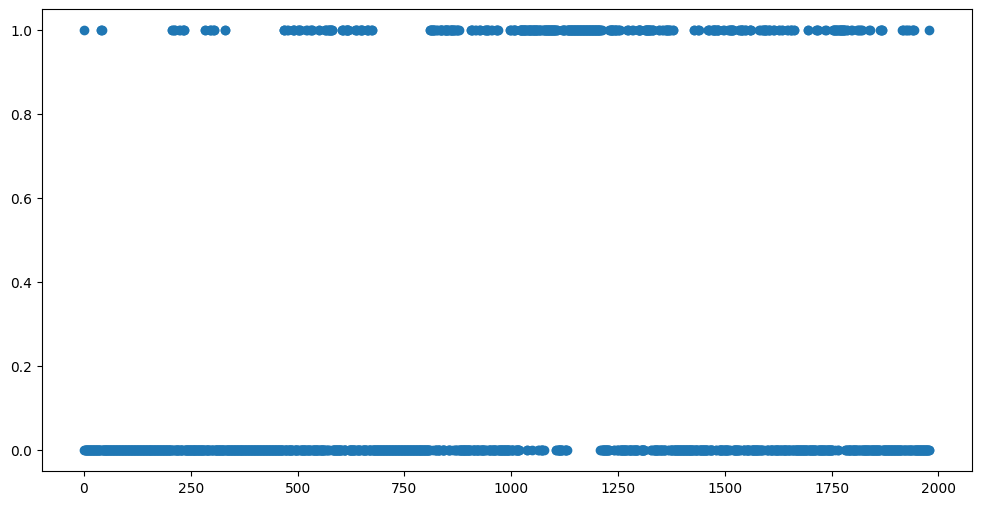

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(x, exon_filter1)

In [29]:
evo2_tensors = safe_open("tensors/roderic_evo2.safetensors", "pt")

In [30]:
evo2_probs = evo2_tensors.get_tensor("mystery_seq")

In [31]:
evo2_entropy = entropy(evo2_probs.to(torch.float32).numpy(), axis=1, base=2)

In [32]:
evo2_entropy

array([1.9933577, 1.9938662, 1.985887 , ..., 1.9816531, 1.9733402,
       1.9691151], dtype=float32)

In [33]:
evo2_ic = 2 - evo2_entropy

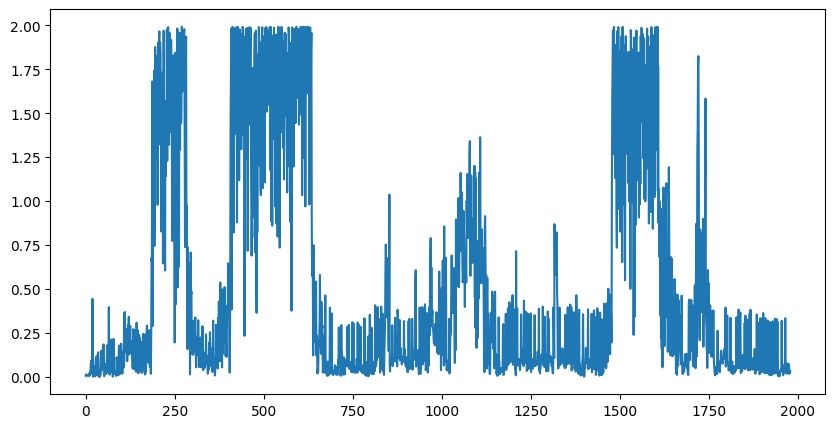

In [34]:
plt.figure(figsize=(10,5))
plt.plot(x, evo2_ic)

In [35]:
evo2_ic_smooth = np.convolve(evo2_ic, [0.25, 0.5, 0.25], "same")

In [36]:
exons = [((187, -0.1), (278, -0.1)), ((409, -0.1), (631, -0.1)), ((1482, -0.1), (1610, -0.1))]

Text(0, 0.5, 'Smoothed information content')

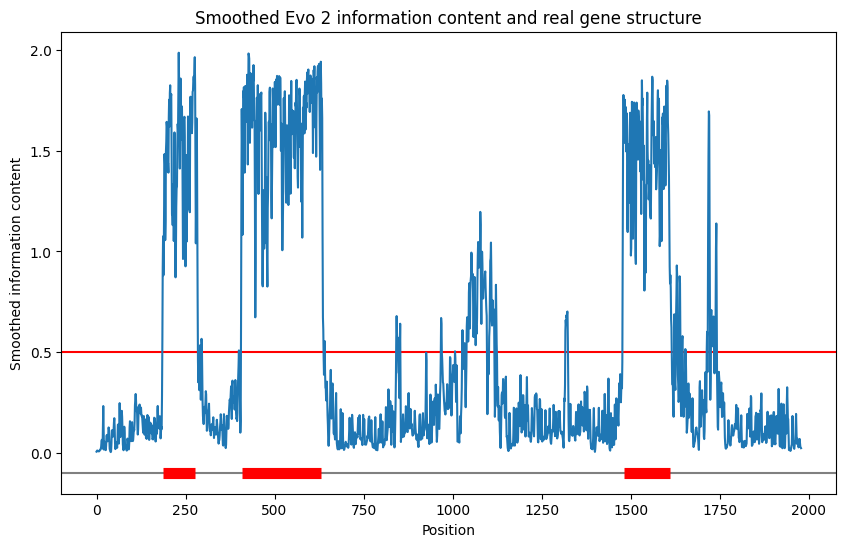

In [37]:
fig, (ax) = plt.subplots(1, figsize=(10,6))
plt.axhline(y=0.5, color="red")
plt.plot(x, evo2_ic_smooth)
plt.axhline(y=-0.1, color="grey")
ax.add_collection(mc.LineCollection(exons, color="red", linewidth=8))
plt.title("Smoothed Evo 2 information content and real gene structure")
ax.set_xlabel("Position")
ax.set_ylabel("Smoothed information content")

In [39]:
gene_tensors = safe_open("tensors/gene_seqs.safetensors", "pt")

In [40]:
gene_tensors.keys()

['danio_yipf5',
 'drosophila_fnta',
 'human_hbb',
 'mouse_rpl27',
 'turtle_nr0b1',
 'xenopus_cytl1',
 'yeast_uso1']

In [42]:
mouse_tensor = gene_tensors.get_tensor("mouse_rpl27")

In [44]:
mouse_ic = 2 - entropy(mouse_tensor.to(torch.float32), axis=1, base=2)

In [45]:
mouse_ic

array([0.00627947, 0.00571942, 0.01399589, ..., 0.05448735, 0.07326734,
       0.24115062], dtype=float32)

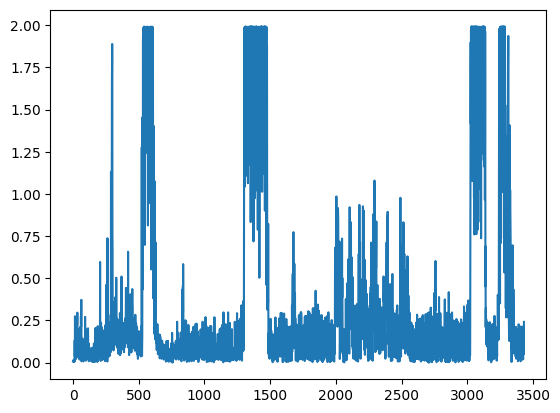

In [46]:
plt.plot(np.arange(0, len(mouse_ic), 1), mouse_ic)